In [1]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
import openweathermapy.core as owm
from citipy import citipy
from pprint import pprint
import seaborn as sns


#API config key
from config import api_key

In [2]:
# Create latitudes and longitudes
# Latitudes range from -90 to 90 and longitudes range from -180 to 180

latitude = np.random.uniform(-90,90,2000) # Function to generate a Random list of 2500 latitude items with a range of -90 to +90
longitude = np.random.uniform(-180,180,2000) # Function to generate a Random list of 2500 longitude items with a range of -180 + 180

print (latitude) # Verifying results via output print
print (longitude) # Verifying results via output print

[-47.18770857  64.32710532   0.67961935 ...  12.74534406  19.3089526
  45.93347111]
[150.18967279 -10.18976839 -73.51575939 ...  78.20806889  20.49777418
  43.46294698]


In [3]:
# Create initial Cities Dataframe for 10 Latitudes and Longitudes
City_Df = pd.DataFrame({"Latitude": latitude, "Longitude": longitude})
City_Df.head() # Display top 5 records of our newly created dataframe

,Latitude,Longitude
0,-47.187709,150.189673
1,64.327105,-10.189768
2,0.679619,-73.515759
3,3.451855,121.040502
4,7.892951,-120.945678


In [4]:
# Add additional columns for Cities, Temperature, Humidity, Cloudiness and Wind Speed to our City_Df
# Note that we used "" to specify initial entries for each new coloumn being added below

City_Df["City"] = ""
City_Df["Country Code"] = ""
City_Df["Temperature"] = ""
City_Df["Cloudiness"] = ""
City_Df["Wind Speed"] = ""
City_Df["Humidity"] = ""
City_Df["URL"] = ""

City_Df.head() # Display top 5 records of our new created dataframe to display newly created columns

,Latitude,Longitude,City,Country Code,Temperature,Cloudiness,Wind Speed,Humidity,URL
0,-47.187709,150.189673,,,,,,,
1,64.327105,-10.189768,,,,,,,
2,0.679619,-73.515759,,,,,,,
3,3.451855,121.040502,,,,,,,
4,7.892951,-120.945678,,,,,,,


In [5]:
# Pull the values of Cities for each Latitude and Longitude and append those values in the City column
# This is being done using our iterrows() method, and using our 'citypy' library/module


# Loop through the Cities_Df and run a latitude/longitude search for each city and its respective country code,
# and append the corresponding values - via iterrows() function and citypy library

for index, row in City_Df.iterrows(): # Start iterating through all the records in our dataframe via iterrows() function
    latitude = row['Latitude'] # Define our latitude variable
    longitude = row ["Longitude"] # Define our longitude variable
    
    # Using .set_value function to populate the 'City' coloumn of our dataframe with the value returned from the citypy function based on input latitude and logitude passed to citpy function
    City_Df.set_value(index, "City", citipy.nearest_city(latitude, longitude).city_name) # function specific syntax
    # Using .set_value function to populate the 'Country Code' coloumn of our dataframe with the value returned from the citypy function based on input latitude and logitude passed to citpy function
    City_Df.set_value(index, "Country Code", citipy.nearest_city(latitude, longitude).country_code) #function specific syntax


City_Df.head(10) # Display top 10 records of our dataframe


/Users/tushaar/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/tushaar/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,Latitude,Longitude,City,Country Code,Temperature,Cloudiness,Wind Speed,Humidity,URL
0,-47.187709,150.189673,hobart,au,,,,,
1,64.327105,-10.189768,sorvag,fo,,,,,
2,0.679619,-73.515759,cartagena del chaira,co,,,,,
3,3.451855,121.040502,manuk mangkaw,ph,,,,,
4,7.892951,-120.945678,cabo san lucas,mx,,,,,
5,-89.430427,-3.871148,hermanus,za,,,,,
6,40.761096,-172.357856,bethel,us,,,,,
7,30.261891,68.544314,duki,pk,,,,,
8,26.354655,75.556195,malpura,in,,,,,
9,7.044268,-50.992446,cayenne,gf,,,,,


In [6]:
# Save config information
# This method is being used because in HW as they have asked us to print the URLs for each city
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

In [7]:
# Create settings dictionary with information we're interested in
# This is because we will feed settings into the openweathermapy.core package 
# This is a good method but it will not help us out in our current assignment because we need to print the URLs
settings = {"units": "imperial", "appid": api_key} # Given a choice this is much easier for API URLs, but this will not help us for our homework

In [8]:
# Loop through all the records of our City_Df via iterrows() method/function

for index, row in City_Df.iterrows():
    city = row['City'] # Define our city variable
    country = row ["Country Code"] # define our country variable
    city_country = str(city)+ "," + str(country) # define our city_country variable, which will the input to our URL
    
    #current_weather = owm.get_current(city_country, **settings) # This would have worked, but not for our HW as we need to print the URL
    
    current_weather_url = url + "&appid=" + api_key + "&q=" + city_country # Completing our input URL for JSON response
    current_weather = requests.get(current_weather_url).json() # This is the JSON Response back to us based on our input URL
    
    #print (current_weather_url) -> Commented this out, was used to verify our code function
    #print (current_weather) -> Commented this out, was used earlier to verify we are getting accurate JSON responses
        
    
    # Now Using Try and Except method to take care of exception responses with API doesn't return valid city/country temperature responses
    
    try:
        
        # Now, again, using .set_value function to populate the Temperature, Humidity, Cloudiness, Wind Speed
        # and URL columns of our DataFrame with the corresponding data being returned from the JSON responses
        
        City_Df.set_value(index, "Temperature", current_weather['main']['temp'])
        City_Df.set_value(index, "Humidity", current_weather['main']['humidity'])
        City_Df.set_value(index, "Cloudiness", current_weather['clouds']['all'])
        City_Df.set_value(index, "Wind Speed", current_weather['wind']['speed'])
        City_Df.set_value(index, "URL", current_weather_url)
        
        # Note - Instead of printing the URLs, I am populating the URL in the dataframe (as the URL column), which will be exported out in an excel csv
        # This makes for a very clean output for our code, versus printing 500+ lines out for each city in the terminal

        # Now, again, using .set_value function to populate the Temperature, Humidity, Cloudiness, Wind Speed 
        # and URL columns of our DataFrame with 
        # "No Data from API" response for all the items where JSON doesn't give us a valid response
        # This is achived via the 'except' function on the 'try and except' routine.
        
    except:
        City_Df.set_value(index, "Temperature", "No Data from API")
        City_Df.set_value(index, "Humidity", "No Data from API")
        City_Df.set_value(index, "Cloudiness", "No Data from API")
        City_Df.set_value(index, "Wind Speed", "No Data from API")
        City_Df.set_value(index, "URL", "No Data from API")
        # print("No Data found") # Just to show us roughly how many records have no valid responses from JSON. This was used
        # for initial debugging, now this has been commented out
        
# Now rearranging the sequence of columns in our City_Df dataframe
City_Df = City_Df[["City", "Country Code", "Latitude", "Longitude","Temperature", "Humidity", "Cloudiness", "Wind Speed", "URL"]]

print ("Process for populating JSON Responses is complete") # Marker to show that the code is complete

/Users/tushaar/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tushaar/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tushaar/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tushaar/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/tushaar/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value 

Process for populating JSON Responses is complete


In [9]:
City_Df.head(10) # Displaying the first 10 records

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,URL
0,hobart,au,-47.187709,150.189673,57.2,67,90,8.05,http://api.openweathermap.org/data/2.5/weather...
1,sorvag,fo,64.327105,-10.189768,No Data from API,No Data from API,No Data from API,No Data from API,No Data from API
2,cartagena del chaira,co,0.679619,-73.515759,72.97,99,92,2.93,http://api.openweathermap.org/data/2.5/weather...
3,manuk mangkaw,ph,3.451855,121.040502,83.01,100,76,9.75,http://api.openweathermap.org/data/2.5/weather...
4,cabo san lucas,mx,7.892951,-120.945678,68,72,5,11.41,http://api.openweathermap.org/data/2.5/weather...
5,hermanus,za,-89.430427,-3.871148,77.11,29,8,9.31,http://api.openweathermap.org/data/2.5/weather...
6,bethel,us,40.761096,-172.357856,33.8,74,90,10.29,http://api.openweathermap.org/data/2.5/weather...
7,duki,pk,30.261891,68.544314,68.43,15,0,4.72,http://api.openweathermap.org/data/2.5/weather...
8,malpura,in,26.354655,75.556195,79.05,25,0,5.95,http://api.openweathermap.org/data/2.5/weather...
9,cayenne,gf,7.044268,-50.992446,84.2,70,75,11.41,http://api.openweathermap.org/data/2.5/weather...


In [10]:
City_Df.to_csv("City_Df.csv", header = True) # Writing the output of our DataFrame to a csv file

In [11]:
# Now filtering out the rows which do not have any API data in our City Dataframe
City_Df_Filter = City_Df[City_Df["Temperature"]!="No Data from API"]
City_Df_Filter.head(10) #Displaying first 10 records

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,URL
0,hobart,au,-47.187709,150.189673,57.2,67,90,8.05,http://api.openweathermap.org/data/2.5/weather...
2,cartagena del chaira,co,0.679619,-73.515759,72.97,99,92,2.93,http://api.openweathermap.org/data/2.5/weather...
3,manuk mangkaw,ph,3.451855,121.040502,83.01,100,76,9.75,http://api.openweathermap.org/data/2.5/weather...
4,cabo san lucas,mx,7.892951,-120.945678,68,72,5,11.41,http://api.openweathermap.org/data/2.5/weather...
5,hermanus,za,-89.430427,-3.871148,77.11,29,8,9.31,http://api.openweathermap.org/data/2.5/weather...
6,bethel,us,40.761096,-172.357856,33.8,74,90,10.29,http://api.openweathermap.org/data/2.5/weather...
7,duki,pk,30.261891,68.544314,68.43,15,0,4.72,http://api.openweathermap.org/data/2.5/weather...
8,malpura,in,26.354655,75.556195,79.05,25,0,5.95,http://api.openweathermap.org/data/2.5/weather...
9,cayenne,gf,7.044268,-50.992446,84.2,70,75,11.41,http://api.openweathermap.org/data/2.5/weather...
11,punta arenas,cl,-73.906078,-88.602061,45.43,52,75,17.22,http://api.openweathermap.org/data/2.5/weather...


In [12]:
City_Df_Filter.to_csv("City_Df_Clean.csv", header = True) # Writing the output of the dataframe to csv file

In [13]:
# Checking the data types for our dataframe
City_Df_Filter.dtypes

City             object
Country Code     object
Latitude        float64
Longitude       float64
Temperature      object
Humidity         object
Cloudiness       object
Wind Speed       object
URL              object
dtype: object

In [14]:
# Drop duplicate cities from our dataframe. This is because we may have some dupicate cities in our data based on our random selction of latitude and longititude
City_Df_Filter_Unique = City_Df_Filter.drop_duplicates(subset = ["City", "Country Code"], keep = 'first')
City_Df_Filter_Unique.head(10) # Displaying top 10 records

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,URL
0,hobart,au,-47.187709,150.189673,57.2,67,90,8.05,http://api.openweathermap.org/data/2.5/weather...
2,cartagena del chaira,co,0.679619,-73.515759,72.97,99,92,2.93,http://api.openweathermap.org/data/2.5/weather...
3,manuk mangkaw,ph,3.451855,121.040502,83.01,100,76,9.75,http://api.openweathermap.org/data/2.5/weather...
4,cabo san lucas,mx,7.892951,-120.945678,68,72,5,11.41,http://api.openweathermap.org/data/2.5/weather...
5,hermanus,za,-89.430427,-3.871148,77.11,29,8,9.31,http://api.openweathermap.org/data/2.5/weather...
6,bethel,us,40.761096,-172.357856,33.8,74,90,10.29,http://api.openweathermap.org/data/2.5/weather...
7,duki,pk,30.261891,68.544314,68.43,15,0,4.72,http://api.openweathermap.org/data/2.5/weather...
8,malpura,in,26.354655,75.556195,79.05,25,0,5.95,http://api.openweathermap.org/data/2.5/weather...
9,cayenne,gf,7.044268,-50.992446,84.2,70,75,11.41,http://api.openweathermap.org/data/2.5/weather...
11,punta arenas,cl,-73.906078,-88.602061,45.43,52,75,17.22,http://api.openweathermap.org/data/2.5/weather...


In [15]:
City_Df_Filter_Unique.to_csv("City_Df_Clean_Unique.csv", header = True) # Writing the output of the dataframe to csv file

In [16]:
# Verifying the lengths of the 3 dataframes - to prove that as we clean out data, our dataframes get smaller in size
print ("Length of our original dataframe is: " + str (len(City_Df))) # Length of our original dataframe
print ("Length of our new dataframe with clean records: " + str (len(City_Df_Filter))) # Length of our new dataframe with records for no API responses removed
print ("Length of our new dataframe with unique cities is: " + str (len(City_Df_Filter_Unique))) # Lenght of our new dataframe with duplicate cities removed

Length of our original dataframe is: 2000
Length of our new dataframe with clean records: 1741
Length of our new dataframe with unique cities is: 662


In [17]:
## The code for Plots follow

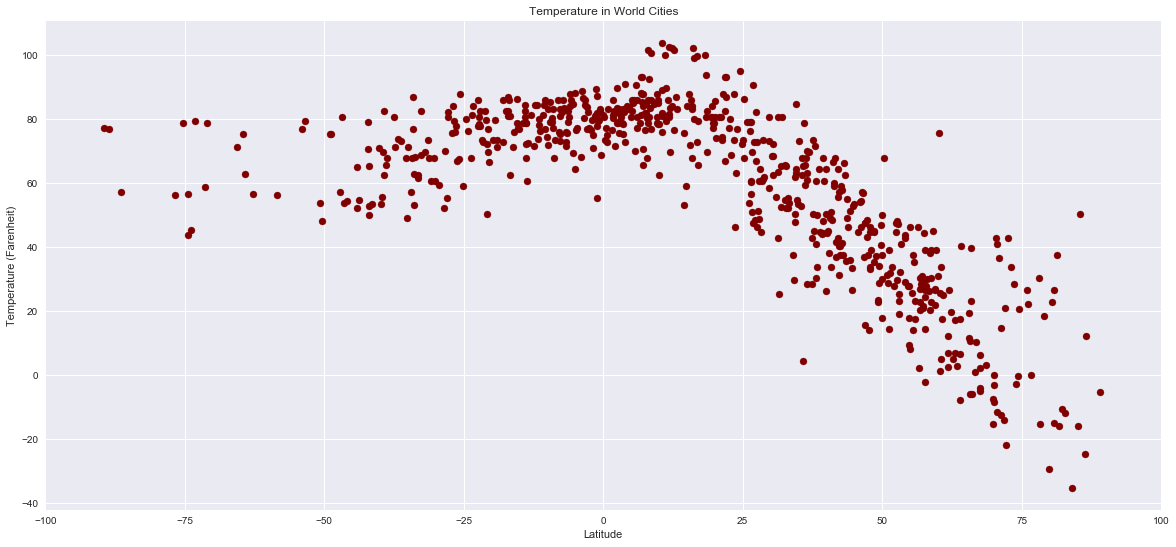

In [22]:
# Use Seaborn
sns.set()

# Build a scatter plot for Temperature (F) vs. Latitude

plt.scatter(City_Df_Filter_Unique["Latitude"], City_Df_Filter_Unique["Temperature"], marker = "o" , color = "maroon",)
plt.xlim(-100,100)

# Incorporate the other graph properties
plt.title("Temperature in World Cities") # Create the title
plt.ylabel("Temperature (Farenheit)") # Create the y label
plt.xlabel("Latitude") # Create the x label
plt.grid(True) # set the grid for our plot (without this command there will no grid)
fig_size = plt.rcParams["figure.figsize"] # Syntax to scale the fix size, by assigning a variable
fig_size[0] = 20 # setting x scale
fig_size[1] = 9 # setting y scale
plt.rcParams["figure.figsize"] = fig_size # writing values back to fig size on the adjusted x and y scale of the variable
plt.savefig("Images/Tushaar_LatitudeVsTemperature.png") # saving the graph as a .png image 
plt.show() # showing our chart/plot/graph


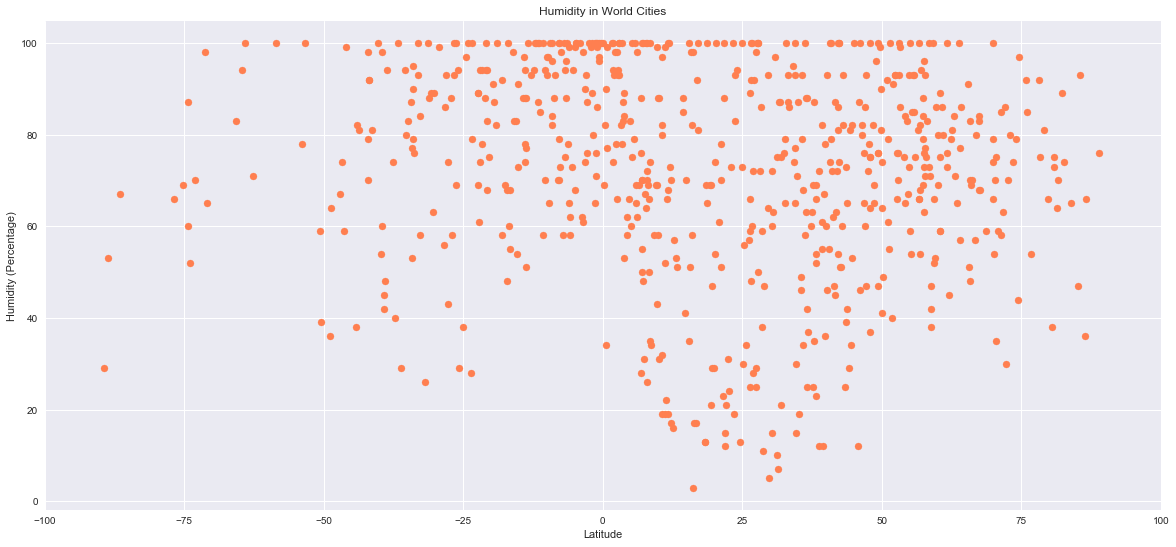

In [23]:
# Use Seaborn
sns.set()

# Build a scatter plot for Humidity (Percentage) vs. Latitude

plt.scatter(City_Df_Filter_Unique["Latitude"], City_Df_Filter_Unique["Humidity"], marker = "o" , color = "coral",)
plt.xlim(-100,100)

# Incorporate the other graph properties
plt.title("Humidity in World Cities")  # Create the title
plt.ylabel("Humidity (Percentage)") # Create the y label
plt.xlabel("Latitude")  # Create the x label
plt.grid(True)  # set the grid for our plot (without this command there will no grid)
fig_size = plt.rcParams["figure.figsize"] # Syntax to scale the fix size, by assigning a variable
fig_size[0] = 20 # setting x scale
fig_size[1] = 9 # setting y scale
plt.rcParams["figure.figsize"] = fig_size # writing values back to fig size on the adjusted x and y scale of the variable
plt.savefig("Images/Tushaar_LatitudeVsHumidity.png") # saving the graph as a .png image
plt.show()  # displaying our chart/plot/graph


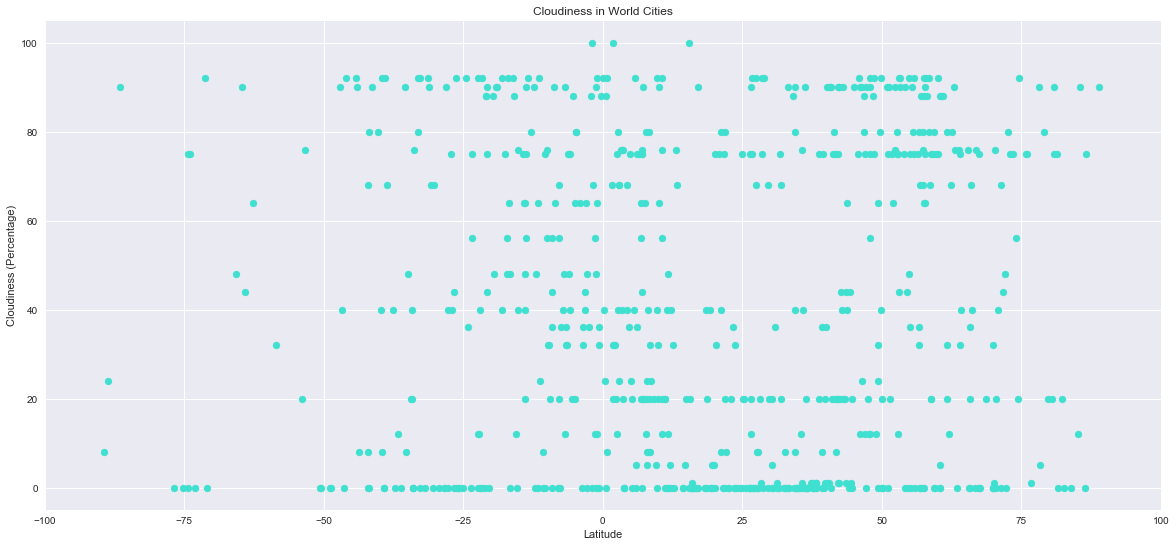

In [20]:
# Use Seaborn
sns.set()

# Build a scatter plot for Cloudiness (Percentage) vs. Latitude

plt.scatter(City_Df_Filter_Unique["Latitude"], City_Df_Filter_Unique["Cloudiness"], marker = "o" , color = "turquoise",)
plt.xlim(-100,100)

# Incorporate the other graph properties
# Comments for the below line of code is exactly same as the above 2 charts
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (Percentage)")
plt.xlabel("Latitude")
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/Tushaar_LatitudeVsCloudiness.png")
plt.show()

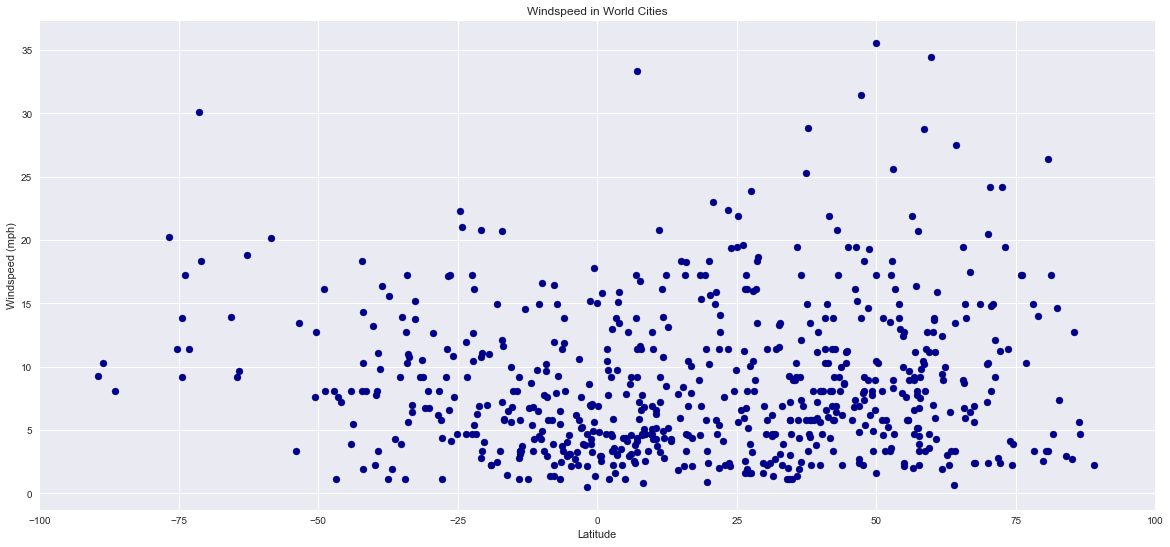

In [21]:
# Use Seaborn
sns.set()

# Build a scatter plot for Windspeed (mph) (F) vs. Latitude

plt.scatter(City_Df_Filter_Unique["Latitude"], City_Df_Filter_Unique["Wind Speed"], marker = "o" , color = "darkblue",)
plt.xlim(-100,100)

# Incorporate the other graph properties
# Comments for the below line of code is exactly same as the above 2 charts

plt.title("Windspeed in World Cities")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20 
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Images/Tushaar_LatitudeVsWind_Speed.png")
plt.show()